<a href="https://colab.research.google.com/github/raheelsiddiqi2013/fruit-grading/blob/main/LocalSindhiGradingFifthNotebook_VGG16_Frozen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grading of Local Sindhi Guava
This notebook is written and executed by **Raheel Siddiqi, PhD**. Fruit grading of **Local Sindhi** guava is performed. It is a multi-class classification problem with three classes: "Green", "Mature Green", and "Ripe". The dataset consists of 711 images with a train-validation-test split of 70-15-15. The pre-trained VGG16 model is used for feature extraction, while a densely connected network is used for final classification. A test set classification accuracy of **91.50%** has been achieved.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Connecting to Google Drive

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!ls "/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi"

Test  Train  Validation


## Importing Relevant Libraries

In [5]:
# Import
import numpy as np
from PIL import Image
import os

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Pre-Trained Model
The convolutional base of the pre-trained VGG16 model will act as the feature extractor. All layers of the feature extractor are frozen.   

In [6]:
vgg16 = VGG16(weights='imagenet', include_top = False, pooling = "avg")
for layer in vgg16.layers:
            layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


## Loading Data

In [7]:
# Create Generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


# Create Data Loaders
train_loader = train_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Train",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

validation_loader= validation_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Validation",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

test_loader = test_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Test",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

Found 498 images belonging to 3 classes.
Found 107 images belonging to 3 classes.
Found 106 images belonging to 3 classes.


## Sample Dataset Images

In [8]:
def plotImages(images_arr,label_arr,rev_look_up):
  fig,axes=plt.subplots(3,3)
  axes=axes.flatten()
  for img,label,ax in zip(images_arr,label_arr,axes):
    ax.imshow(img)
    ax.set_title(rev_look_up[np.argmax(label)])
    ax.axis('off')
  plt.tight_layout()
  plt.show()

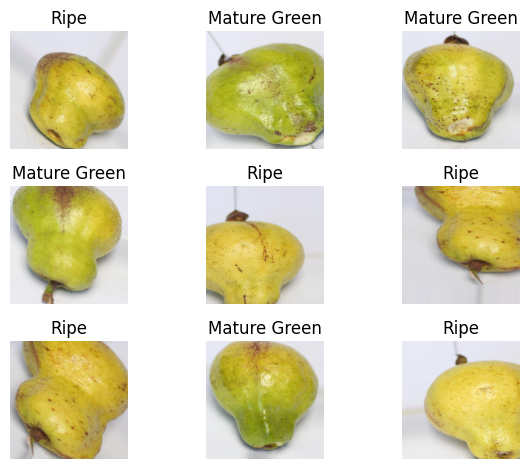

In [9]:
imgs, labels = train_loader[0]
reverse_lookup={val:key for key, val in dict(train_loader.class_indices).items()}
plotImages(imgs,labels,reverse_lookup)

In [10]:
print(imgs.shape)

(32, 224, 224, 3)


## Dataset Classes

In [11]:
train_loader.class_indices

{'Green': 0, 'Mature Green': 1, 'Ripe': 2}

## Hyperparameter Settings and Model Compilation

In [12]:
from keras.callbacks import ModelCheckpoint
import keras

optimizer = keras.optimizers.Adam(lr=0.0001)
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['categorical_accuracy'])
model.summary()

filepath="best_model_vgg16.h5"
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True)
callbacks_list = [checkpoint]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 14780739 (56.38 MB)
Trainable params: 66051 (258.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## Model Training

In [13]:
import math

model_train_history = model.fit_generator(
    generator = train_loader,
    steps_per_epoch = math.ceil(498//32),
    epochs = 100,
    callbacks=callbacks_list,
    validation_data = validation_loader,
    validation_steps = math.ceil(107//32)
)

<ipython-input-13-6e726d79eb7f>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_train_history = model.fit_generator(


Epoch 1/100
15/15 [==============================] - 154s 10s/step - loss: 1.0354 - categorical_accuracy: 0.5150 - val_loss: 0.9906 - val_categorical_accuracy: 0.3646


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
15/15 [==============================] - 12s 817ms/step - loss: 0.9502 - categorical_accuracy: 0.5193 - val_loss: 0.9402 - val_categorical_accuracy: 0.5208
Epoch 3/100
15/15 [==============================] - 13s 806ms/step - loss: 0.9074 - categorical_accuracy: 0.5923 - val_loss: 0.8622 - val_categorical_accuracy: 0.5000
Epoch 4/100
15/15 [==============================] - 12s 811ms/step - loss: 0.8633 - categorical_accuracy: 0.5979 - val_loss: 0.8374 - val_categorical_accuracy: 0.6250
Epoch 5/100
15/15 [==============================] - 12s 825ms/step - loss: 0.8146 - categorical_accuracy: 0.5687 - val_loss: 0.7796 - val_categorical_accuracy: 0.5312
Epoch 6/100
15/15 [==============================] - 11s 703ms/step - loss: 0.7899 - categorical_accuracy: 0.6137 - val_loss: 0.7481 - val_categorical_accuracy: 0.5833
Epoch 7/100
15/15 [==============================] - 13s 894ms/step - loss: 0.7567 - categorical_accuracy: 0.6609 - val_loss: 0.6801 - val_categorical_accuracy:

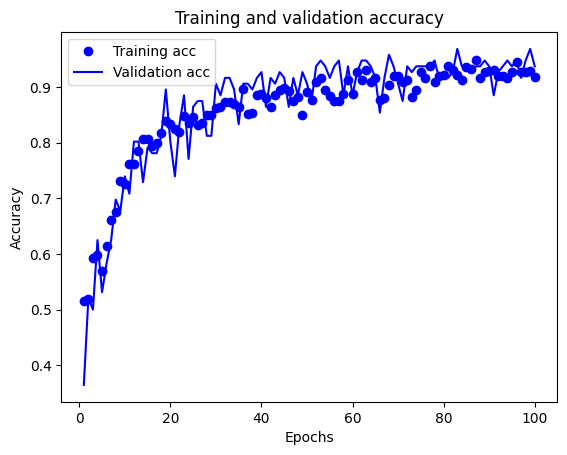

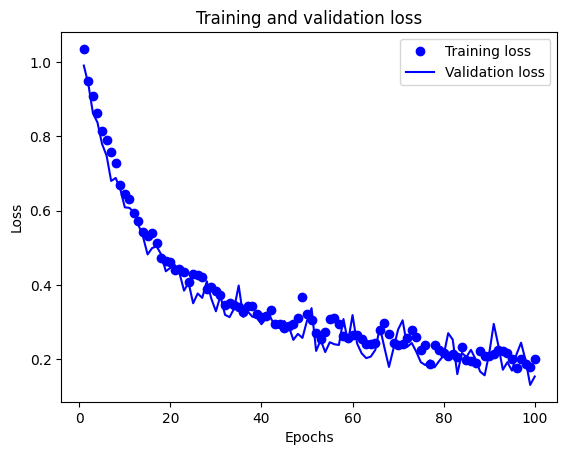

In [14]:
acc=model_train_history.history['categorical_accuracy']
val_acc=model_train_history.history['val_categorical_accuracy']
loss=model_train_history.history['loss']
val_loss=model_train_history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Testing and Confusion Matrix

First I prepare the test data.

In [15]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical
import cv2

green_cases_dir = Path('/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Test/Green')
mature_green_cases_dir = Path(r'/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Test/Mature Green')
ripe_cases_dir= Path('/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Test/Ripe')

green_cases = green_cases_dir.glob('*.jpg')
mature_green_cases = mature_green_cases_dir.glob('*.jpg')
ripe_cases = ripe_cases_dir.glob('*.jpg')

image_width=224
image_height=224

test_data = []
test_labels = []

for img in green_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in mature_green_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in ripe_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (106, 224, 224, 3)
Total number of labels: (106, 1)


In [16]:
from keras.models import load_model
best_model = load_model('best_model_vgg16.h5')

The following is the model accuracy on the test set:

In [17]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

4/4 [==============================] - 4s 1s/step - loss: 0.1289 - categorical_accuracy: 0.9528
Loss on test set:  0.1289491057395935
Accuracy on test set:  0.9528301954269409


Now I get all the model predictions.

In [18]:
# Get predictions
preds = best_model.predict(test_data, batch_size=32)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(106,1))

4/4 [==============================] - 1s 151ms/step


The following is the confusion matrix for the model:

<Figure size 640x480 with 0 Axes>

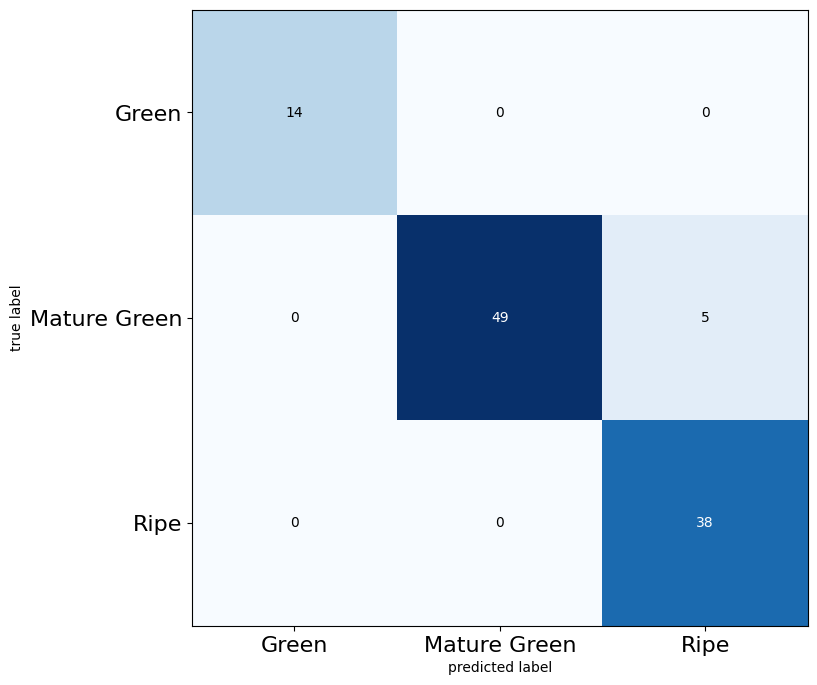

In [19]:
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['Green','Mature Green','Ripe'], fontsize=16)
plt.yticks(range(3), ['Green','Mature Green','Ripe'], fontsize=16)
plt.show()